<a href="https://colab.research.google.com/github/LuziaAm/DataScience/blob/main/Aula4_ML_INDT_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [716]:
#Aula3_ML_INDT_Supervisionado_Balanceamento.ipynb

In [717]:
#Balancear dados
#Auto: Luzia Amorim
#15/07/21

In [718]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [719]:
dados = pd.read_csv('/content/fertility_Diagnosis.txt', ',')

In [720]:
# Avaliar a frequencia original das classes

In [721]:
dados.Output.value_counts()

N    88
O    12
Name: Output, dtype: int64

In [722]:
#Balancear os dados (em função da Classe)
#Usando SMOTE

In [723]:
from imblearn.over_sampling import SMOTE

In [724]:
#Segmetar os dados em duas bases: Uma com os atributos e outra com as classes

In [725]:
dados_atributos=dados.drop(columns='Output')

In [726]:
dados_classe = dados['Output']

In [727]:
#Construir um objeto a partir do SMOTE

In [728]:
balanceador = SMOTE()

In [729]:
#Executar o balanceador

In [730]:
dados_atributos_b,dados_classe_b = balanceador.fit_resample(
    dados_atributos,dados_classe
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [731]:
#dados_classe_b.value_counts() #não funcionou no colab

In [732]:
from collections import Counter

In [733]:
#Visualizar os dados Balanceados

In [734]:
contagem_classes = Counter(dados_classe_b)

In [735]:
contagem_classes

Counter({'N': 88, 'O': 88})

In [736]:
#Recompor os dados

In [737]:
dados_atributos_b =  pd.DataFrame(dados_atributos_b, columns=['Season',
                                                              'Age',
                                                              'Childish_diseases',
                                                              'Accident',
                                                              'Surgical_intervention',
                                                              'High_fevers',
                                                              'alcohol_consumption',
                                                              'Smoking',
                                                              'hours_sitting'])

In [738]:
dados_classe_b =  pd.DataFrame(dados_classe_b, columns=['Output'])

In [739]:
dados = dados_atributos_b.join(dados_classe_b, how='left')

In [740]:
dados.head() # FIM DO BALANCEAMENTO

,Season,Age,Childish_diseases,Accident,Surgical_intervention,High_fevers,alcohol_consumption,Smoking,hours_sitting,Output
0,-0.33,0.69,0.0,1.0,1.0,0.0,0.8,0.0,0.88,N
1,-0.33,0.94,1.0,0.0,1.0,0.0,0.8,1.0,0.31,O
2,-0.33,0.50,1.0,0.0,0.0,0.0,1.0,-1.0,0.50,N
3,-0.33,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38,N
4,-0.33,0.67,1.0,1.0,0.0,0.0,0.8,-1.0,0.50,O


In [741]:
#CRIAR UM MODELO CLASSIFICADOR

In [742]:
from sklearn.model_selection import train_test_split #Divisão de porcentagem de amostra teste

In [743]:
#a)Segmentar m atributos e classes

In [744]:
dados_atributos = dados.drop(columns='Output')
dados_classe =  dados['Output']

In [745]:
#b) Segmentar em base de treinamento e base para teste

In [746]:
atributos_treinamento, atributos_testes, classe_treinamento, classe_testes = train_test_split(dados_atributos,dados_classe, test_size=0.3)

In [747]:
#c)Obter o modelo

In [748]:
from sklearn.ensemble import RandomForestClassifier

In [749]:
#c)Treinar o modelo

In [750]:
rf = RandomForestClassifier() #instancia

In [751]:
fertility_RF = rf.fit(atributos_treinamento, classe_treinamento)

In [752]:
#Pre testar o modelo utilizando as classes para teste

In [753]:
test_fertility = fertility_RF.predict(atributos_testes)

In [754]:
test_fertility

array(['O', 'N', 'O', 'O', 'N', 'N', 'N', 'N', 'O', 'O', 'N', 'O', 'O',
       'O', 'N', 'N', 'O', 'O', 'O', 'N', 'O', 'O', 'O', 'O', 'N', 'N',
       'O', 'N', 'N', 'N', 'O', 'N', 'N', 'O', 'N', 'N', 'O', 'N', 'N',
       'N', 'N', 'O', 'O', 'O', 'O', 'N', 'O', 'O', 'N', 'O', 'O', 'N',
       'N'], dtype=object)

In [755]:
for i in range(0,len(classe_testes)):
  print('Classe:', classe_testes.iloc[i],':',test_fertility[i])

Classe: O : O
Classe: N : N
Classe: O : O
Classe: O : O
Classe: N : N
Classe: N : N
Classe: O : N
Classe: O : N
Classe: O : O
Classe: O : O
Classe: N : N
Classe: O : O
Classe: O : O
Classe: O : O
Classe: N : N
Classe: N : N
Classe: O : O
Classe: O : O
Classe: O : O
Classe: N : N
Classe: O : O
Classe: N : O
Classe: O : O
Classe: O : O
Classe: N : N
Classe: N : N
Classe: O : O
Classe: N : N
Classe: N : N
Classe: N : N
Classe: O : O
Classe: N : N
Classe: N : N
Classe: O : O
Classe: N : N
Classe: N : N
Classe: O : O
Classe: N : N
Classe: N : N
Classe: N : N
Classe: N : N
Classe: O : O
Classe: O : O
Classe: O : O
Classe: O : O
Classe: N : N
Classe: O : O
Classe: O : O
Classe: N : N
Classe: O : O
Classe: O : O
Classe: N : N
Classe: N : N


In [756]:
from pickle import dump

In [757]:
dump(test_fertility,open('random.pkl','wb'))

In [758]:
from sklearn.tree import DecisionTreeClassifier

In [759]:
rf1 = DecisionTreeClassifier()

In [760]:
fertility_DTC = rf1.fit(atributos_treinamento,classe_treinamento)

In [761]:
test_fertility_DTC = fertility_DTC.predict(atributos_testes)

In [762]:
test_fertility_DTC

array(['N', 'N', 'O', 'O', 'N', 'N', 'O', 'N', 'O', 'O', 'N', 'O', 'O',
       'O', 'N', 'N', 'O', 'O', 'O', 'N', 'O', 'O', 'O', 'O', 'N', 'N',
       'O', 'N', 'N', 'N', 'O', 'N', 'N', 'O', 'N', 'N', 'O', 'N', 'O',
       'N', 'N', 'O', 'O', 'O', 'O', 'N', 'O', 'O', 'N', 'O', 'O', 'N',
       'N'], dtype=object)

In [763]:
#Teste preliminar de acurácia

In [764]:
from sklearn import metrics

In [765]:
metrics.accuracy_score(classe_testes,test_fertility)

0.9433962264150944

In [766]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

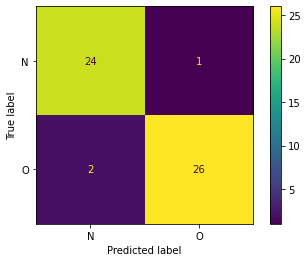

In [767]:
plot_confusion_matrix(fertility_RF, atributos_testes,classe_testes)

In [768]:
#--------CROSS VALIDATION

In [769]:
#Segmentar a base em atributos e classes (caso não esteja segmentada)
#dados_atributos
#dados_classe
#importar o CROSS_VAL

In [770]:
from sklearn.model_selection import cross_val_score

In [771]:
scores=cross_val_score(fertility_RF,dados_atributos,dados_classe, cv=10)#cv = kfolds

In [772]:
scores #cross_val

array([0.66666667, 0.77777778, 1.        , 1.        , 1.        ,
       1.        , 0.94117647, 0.88235294, 1.        , 0.94117647])

In [773]:
scores.mean #acuracia global
scores.std

<function ndarray.std>

In [774]:
from sklearn.model_selection import cross_validate

In [775]:
scoring = ['precision_macro','recall_macro']

In [776]:
scoring

['precision_macro', 'recall_macro']

In [777]:
scores2 = cross_validate(fertility_RF, dados_atributos, dados_classe, scoring=scoring,cv=10)

In [783]:
scores2.keys()

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro'])

In [779]:
#Acuracia Global score2

In [782]:
scores2.mean

TypeError: ignored

In [ ]:
#Sensibilidade

In [ ]:
scores2['recall_macro'].mean()

In [ ]:
from pickle import dump
dump(fertility_RF,open('fertility_RF.pkl','wb'))

In [ ]:
#TUNNING DO MODELO - HIPERPARAMETROS

In [ ]:
rf.get_params()

In [ ]:
#----OTIMIZAÇÂO

In [ ]:
#Criar grade de hiper parametros

In [ ]:
n_estimators=[50,100,200]
max_features = ['auto','sqrt']
max_depth = [10,50,100]

In [ ]:
random_grid={'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth 
            }

In [ ]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
from pprint import pprint

In [ ]:
rf_grid = GridSearchCV(rf, random_grid,  refit=True, verbose=2)

In [ ]:
rf_grid.fit(dados_atributos,dados_classe)
pprint(rf_grid.best_params_)

In [ ]:
rf =  RandomForestClassifier(max_depth=50, 
                                max_features='sqrt', 
                                n_estimators=50)
rf_fertility_otimizado = rf.fit(atributos_treinamento, 
                                classe_treinamento,
                                )
scores2 = cross_validate(rf_fertility_otimizado,dados_atributos,dados_classe,scoring=scoring,cv=10)

In [ ]:
scores2.keys()

In [ ]:
scores2['test_precision_macro'].mean()
scores2['test_recall_macro'].mean()